In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 18.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
naft_full_articles_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tempi-data-analysis/articles.csv/naft_tempi_articles.csv")
naft_full_articles_df

article_url  \
0    https://www.naftemporiki.gr/politics/1930155/n...   
1    https://www.naftemporiki.gr/politics/1930100/v...   
2    https://www.naftemporiki.gr/politics/1929993/a...   
3    https://www.naftemporiki.gr/politics/1929961/v...   
4    https://www.naftemporiki.gr/society/1929751/te...   
..                                                 ...   
325  https://www.naftemporiki.gr/opinion/1770541/i-...   
326  https://www.naftemporiki.gr/politics/1768615/k...   
327  https://www.naftemporiki.gr/politics/1766858/n...   
328  https://www.naftemporiki.gr/politics/1754140/s...   
329  https://www.naftemporiki.gr/society/1730502/te...   

                                                 title        date      time  \
0    Ντ. Μπακογιάννη: Ως βουλευτής, ζητώ συγγνώμη α...  2025-03-06  21:19:03   
1    Βουλή: Αντιπαράθεση Χρυσοχοΐδη με ΚΚΕ και Νέα ...  2025-03-06  18:55:18   
2    Αλ. Χαρίτσης για Τέμπη: Ο πρωθυπουργός «έκανε ...  2025-03-06  16:10:10   
3    Βουλή: Νέος γύρος σφοδρής αντιπαράθεσης – Κόντ...  2025-03-06  15:39:24   
4    Τέμπη: Ξανά στους δρόμους μαθητές και φοιτητές...  2025-03-06  07:59:18   
..                                                 ...         ...       ...   
325  Το χαρτοφυλάκιο Μεταφορών, η Ναυτιλία, τα Τέμπ...  2024-09-19  09:29:20   
326  Κ. Αρβανίτης: Με το χαρτοφυλάκιο Τζιτζικώστα ε...  2024-09-17  12:54:06   
327  Ν. Παππάς για Τέμπη: Το μπάζωμα έγινε με χρήμα...  2024-09-15  13:09:24   
328  ΣΥΡΙΖΑ-Τέμπη: Αίτημα στην Εισαγγελία για νέες ...  2024-08-31  14:47:05   
329  Τέμπη: Αποφυλακίστηκε ο σταθμάρχης Λάρισας – Σ...  2024-08-01  08:54:18   

      section                                             author  \
0    Πολιτική                                                NaN   
1    Πολιτική                                                NaN   
2    Πολιτική                                                NaN   
3    Πολιτική                                                NaN   
4    Κοινωνία                                                NaN   
..        ...                                                ...   
325   Απόψεις  Νατάσα Στασινού                               ...   
326  Πολιτική                                                NaN   
327  Πολιτική                                                NaN   
328  Πολιτική                                                NaN   
329  Κοινωνία                                                NaN   

                                               excerpt  \
0    «Ειλικρινή συγγνώμη» στους γονείς των παιδιών ...   
1    «Η υπόθεση των Τεμπών με τα 57 θύματα είναι μι...   
2    Για έναν πρωθυπουργό «θρασύ» και «αλαζόνα» έκα...   
3    Πυρά και αντεγκλήσεις μεταξύ του υπουργού Επικ...   
4    Νέο συλλαλητήριο για τα Τέμπη διοργανώνουν την...   
..                                                 ...   
325                                                NaN   
326  Δηκτικά σχολίασε ο επικεφαλής της ευρωομάδας τ...   
327                                                NaN   
328  Αίτημα «για διερεύνηση νέων ποινικών αδικημάτω...   
329                                                NaN   

                                             text_body  \
0    «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   
1    Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   
2    Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...   
3    Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...   
4    «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...   
..                                                 ...   
325  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...   
326  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...   
327  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...   
328  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...   
329  Σε κατ’ οίκον περιορισμό βρίσκεται πλέον ο στα...   

                                         feat_img_link  \
0    https://www.naftemporiki.gr/wp-content/themes/...   
1    https://www.naftemporiki.gr/wp-content/themes/...   


In [ ]:
naft_full_articles_df.dtypes

article_url        object
title              object
date               object
time               object
section            object
author             object
excerpt            object
text_body          object
feat_img_link      object
feat_img_cation    object
dtype: object

In [ ]:
naft_full_articles_df=naft_full_articles_df.drop_duplicates(subset=["text_body"])
naft_full_articles_df=naft_full_articles_df.dropna(subset=["date", "text_body"])
naft_full_articles_df

article_url  \
0    https://www.naftemporiki.gr/politics/1930155/n...   
1    https://www.naftemporiki.gr/politics/1930100/v...   
2    https://www.naftemporiki.gr/politics/1929993/a...   
3    https://www.naftemporiki.gr/politics/1929961/v...   
4    https://www.naftemporiki.gr/society/1929751/te...   
..                                                 ...   
325  https://www.naftemporiki.gr/opinion/1770541/i-...   
326  https://www.naftemporiki.gr/politics/1768615/k...   
327  https://www.naftemporiki.gr/politics/1766858/n...   
328  https://www.naftemporiki.gr/politics/1754140/s...   
329  https://www.naftemporiki.gr/society/1730502/te...   

                                                 title        date      time  \
0    Ντ. Μπακογιάννη: Ως βουλευτής, ζητώ συγγνώμη α...  2025-03-06  21:19:03   
1    Βουλή: Αντιπαράθεση Χρυσοχοΐδη με ΚΚΕ και Νέα ...  2025-03-06  18:55:18   
2    Αλ. Χαρίτσης για Τέμπη: Ο πρωθυπουργός «έκανε ...  2025-03-06  16:10:10   
3    Βουλή: Νέος γύρος σφοδρής αντιπαράθεσης – Κόντ...  2025-03-06  15:39:24   
4    Τέμπη: Ξανά στους δρόμους μαθητές και φοιτητές...  2025-03-06  07:59:18   
..                                                 ...         ...       ...   
325  Το χαρτοφυλάκιο Μεταφορών, η Ναυτιλία, τα Τέμπ...  2024-09-19  09:29:20   
326  Κ. Αρβανίτης: Με το χαρτοφυλάκιο Τζιτζικώστα ε...  2024-09-17  12:54:06   
327  Ν. Παππάς για Τέμπη: Το μπάζωμα έγινε με χρήμα...  2024-09-15  13:09:24   
328  ΣΥΡΙΖΑ-Τέμπη: Αίτημα στην Εισαγγελία για νέες ...  2024-08-31  14:47:05   
329  Τέμπη: Αποφυλακίστηκε ο σταθμάρχης Λάρισας – Σ...  2024-08-01  08:54:18   

      section                                             author  \
0    Πολιτική                                                NaN   
1    Πολιτική                                                NaN   
2    Πολιτική                                                NaN   
3    Πολιτική                                                NaN   
4    Κοινωνία                                                NaN   
..        ...                                                ...   
325   Απόψεις  Νατάσα Στασινού                               ...   
326  Πολιτική                                                NaN   
327  Πολιτική                                                NaN   
328  Πολιτική                                                NaN   
329  Κοινωνία                                                NaN   

                                               excerpt  \
0    «Ειλικρινή συγγνώμη» στους γονείς των παιδιών ...   
1    «Η υπόθεση των Τεμπών με τα 57 θύματα είναι μι...   
2    Για έναν πρωθυπουργό «θρασύ» και «αλαζόνα» έκα...   
3    Πυρά και αντεγκλήσεις μεταξύ του υπουργού Επικ...   
4    Νέο συλλαλητήριο για τα Τέμπη διοργανώνουν την...   
..                                                 ...   
325                                                NaN   
326  Δηκτικά σχολίασε ο επικεφαλής της ευρωομάδας τ...   
327                                                NaN   
328  Αίτημα «για διερεύνηση νέων ποινικών αδικημάτω...   
329                                                NaN   

                                             text_body  \
0    «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   
1    Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   
2    Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...   
3    Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...   
4    «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...   
..                                                 ...   
325  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...   
326  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...   
327  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...   
328  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...   
329  Σε κατ’ οίκον περιορισμό βρίσκεται πλέον ο στα...   

                                         feat_img_link  \
0    https://www.naftemporiki.gr/wp-content/themes/...   
1    https://www.naftemporiki.gr/wp-content/themes/...   


In [ ]:
len(naft_full_articles_df)

329

In [ ]:
naft_full_articles_df.head()

article_url  \
0  https://www.naftemporiki.gr/politics/1930155/n...   
1  https://www.naftemporiki.gr/politics/1930100/v...   
2  https://www.naftemporiki.gr/politics/1929993/a...   
3  https://www.naftemporiki.gr/politics/1929961/v...   
4  https://www.naftemporiki.gr/society/1929751/te...   

                                               title        date      time  \
0  Ντ. Μπακογιάννη: Ως βουλευτής, ζητώ συγγνώμη α...  2025-03-06  21:19:03   
1  Βουλή: Αντιπαράθεση Χρυσοχοΐδη με ΚΚΕ και Νέα ...  2025-03-06  18:55:18   
2  Αλ. Χαρίτσης για Τέμπη: Ο πρωθυπουργός «έκανε ...  2025-03-06  16:10:10   
3  Βουλή: Νέος γύρος σφοδρής αντιπαράθεσης – Κόντ...  2025-03-06  15:39:24   
4  Τέμπη: Ξανά στους δρόμους μαθητές και φοιτητές...  2025-03-06  07:59:18   

    section author                                            excerpt  \
0  Πολιτική    NaN  «Ειλικρινή συγγνώμη» στους γονείς των παιδιών ...   
1  Πολιτική    NaN  «Η υπόθεση των Τεμπών με τα 57 θύματα είναι μι...   
2  Πολιτική    NaN  Για έναν πρωθυπουργό «θρασύ» και «αλαζόνα» έκα...   
3  Πολιτική    NaN  Πυρά και αντεγκλήσεις μεταξύ του υπουργού Επικ...   
4  Κοινωνία    NaN  Νέο συλλαλητήριο για τα Τέμπη διοργανώνουν την...   

                                           text_body  \
0  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   
1  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   
2  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...   
3  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...   
4  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...   

                                       feat_img_link  \
0  https://www.naftemporiki.gr/wp-content/themes/...   
1  https://www.naftemporiki.gr/wp-content/themes/...   
2  https://www.naftemporiki.gr/wp-content/themes/...   
3  https://www.naftemporiki.gr/wp-content/themes/...   
4  https://www.naftemporiki.gr/wp-content/themes/...   

                                     feat_img_cation  
0  Απευθυνόμενη προς την αντιπολίτευση, είπε πως ...  
1  Στο επίκεντρο βρέθηκαν τα επεισόδια που σημειώ...  
2  Αιχμές του κ. Χαρίτση για όσα είπε ο πρωθυπουρ...  
3                          Οι τόνοι ανέβηκαν στα ύψη  
4        «Μέχρι η δικαίωση να 'ρθει εδώ θα μείνουμε»

In [ ]:
short_naft_fa_df = naft_full_articles_df[['date','text_body' ]]
short_naft_fa_df = short_naft_fa_df.rename(columns={'text_body': 'text'} )
short_naft_fa_df['site']='naftemporiki'
short_naft_fa_df

date                                               text  \
0    2025-03-06  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   
1    2025-03-06  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   
2    2025-03-06  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...   
3    2025-03-06  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...   
4    2025-03-06  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...   
..          ...                                                ...   
325  2024-09-19  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...   
326  2024-09-17  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...   
327  2024-09-15  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...   
328  2024-08-31  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...   
329  2024-08-01  Σε κατ’ οίκον περιορισμό βρίσκεται πλέον ο στα...   

             site  
0    naftemporiki  
1    naftemporiki  
2    naftemporiki  
3    naftemporiki  
4    naftemporiki  
..            ...  
325  naftemporiki  
326  naftemporiki  
327  naftemporiki  
328  naftemporiki  
329  naftemporiki  

[329 rows x 3 columns]

In [ ]:
short_naft_fa_df['text'] = short_naft_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
short_naft_fa_df.tail()

date                                               text  \
325  2024-09-19  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...   
326  2024-09-17  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...   
327  2024-09-15  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...   
328  2024-08-31  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...   
329  2024-08-01  Σε κατ’ οίκον περιορισμό βρίσκεται πλέον ο στα...   

             site  
325  naftemporiki  
326  naftemporiki  
327  naftemporiki  
328  naftemporiki  
329  naftemporiki

In [ ]:
short_naft_fa_df['date'] = pd.to_datetime(short_naft_fa_df['date'], format='%Y-%m-%d')

In [ ]:
short_naft_fa_df.dtypes

date    datetime64[ns]
text            object
site            object
dtype: object

In [ ]:
short_naft_fa_df['text'] = short_naft_fa_df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ", regex=True)

In [ ]:
short_naft_fa_df.head()

date                                               text          site
0 2025-03-06  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...  naftemporiki
1 2025-03-06  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...  naftemporiki
2 2025-03-06  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...  naftemporiki
3 2025-03-06  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...  naftemporiki
4 2025-03-06  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...  naftemporiki

In [ ]:
short_naft_fa_df.to_csv('short_naft_fa.csv', index=False)

In [ ]:
from google.colab import files
files.download('short_naft_fa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_naft_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    1     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(329, 13161)

In [ ]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1)

0      20
1      21
2      11
3      31
4       3
       ..
324     5
325     7
326     3
327     2
328     1
Length: 329, dtype: int64

In [ ]:
short_naft_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_naft_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_naft_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_naft_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_naft_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_naft_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_naft_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_naft_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_naft_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_naft_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_naft_fa_df

date                                               text  anger  \
0   2025-03-06  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   10.0   
1   2025-03-06  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   11.0   
2   2025-03-06  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...    1.0   
3   2025-03-06  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...    8.0   
4   2025-03-06  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...    4.0   
..         ...                                                ...    ...   
325 2024-09-19  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...    4.0   
326 2024-09-17  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...    2.0   
327 2024-09-15  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...    0.0   
328 2024-08-31  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...    0.0   
329 2024-08-01  Σε κατ’ οίκον περιορισμό βρίσκεται πλέον ο στα...    NaN   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0        19.0  4.0     10.0       4.0   20.0           7.0     13.0      29.0   
1        26.0  7.0     13.0      11.0   21.0          11.0     11.0      22.0   
2        12.0  2.0      3.0       4.0   11.0           2.0      4.0      11.0   
3        43.0  6.0      5.0       9.0   31.0          18.0     13.0      29.0   
4         6.0  1.0      2.0       0.0    3.0           2.0      1.0       5.0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
325      12.0  1.0      2.0       3.0    7.0           2.0      7.0      13.0   
326       4.0  1.0      0.0       0.0    3.0           2.0      1.0       3.0   
327       0.0  0.0      0.0       0.0    2.0           0.0      0.0       0.0   
328       1.0  1.0      0.0       0.0    1.0           0.0      0.0       0.0   
329       NaN  NaN      NaN       NaN    NaN           NaN      NaN       NaN   

     fear  
0    17.0  
1    13.0  
2     5.0  
3    18.0  
4     2.0  
..    ...  
325   9.0  
326   1.0  
327   0.0  
328   0.0  
329   NaN  

[329 rows x 12 columns]

In [ ]:
short_naft_fa_df.dropna(inplace=True)
short_naft_fa_df

date                                               text  anger  \
0   2025-03-06  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   10.0   
1   2025-03-06  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   11.0   
2   2025-03-06  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...    1.0   
3   2025-03-06  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...    8.0   
4   2025-03-06  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...    4.0   
..         ...                                                ...    ...   
324 2024-09-22  Ο αντιπρόεδρος της Left και επικεφαλής της Ευρ...    8.0   
325 2024-09-19  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...    4.0   
326 2024-09-17  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...    2.0   
327 2024-09-15  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...    0.0   
328 2024-08-31  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...    0.0   

     positive  joy  disgust  surprise  trust  anticipation  sadness  negative  \
0        19.0  4.0     10.0       4.0   20.0           7.0     13.0      29.0   
1        26.0  7.0     13.0      11.0   21.0          11.0     11.0      22.0   
2        12.0  2.0      3.0       4.0   11.0           2.0      4.0      11.0   
3        43.0  6.0      5.0       9.0   31.0          18.0     13.0      29.0   
4         6.0  1.0      2.0       0.0    3.0           2.0      1.0       5.0   
..        ...  ...      ...       ...    ...           ...      ...       ...   
324       7.0  0.0      4.0       2.0    5.0           4.0      4.0      13.0   
325      12.0  1.0      2.0       3.0    7.0           2.0      7.0      13.0   
326       4.0  1.0      0.0       0.0    3.0           2.0      1.0       3.0   
327       0.0  0.0      0.0       0.0    2.0           0.0      0.0       0.0   
328       1.0  1.0      0.0       0.0    1.0           0.0      0.0       0.0   

     fear  
0    17.0  
1    13.0  
2     5.0  
3    18.0  
4     2.0  
..    ...  
324   8.0  
325   9.0  
326   1.0  
327   0.0  
328   0.0  

[328 rows x 12 columns]

In [ ]:
short_naft_fa_df.reset_index(inplace=True)
short_naft_fa_df.set_index('date', inplace=True)
short_naft_fa_df

index                                               text  anger  \
date                                                                          
2025-03-06      0  «Όλοι μας και οι 300 βουλευτές, όπως και ολόκλ...   10.0   
2025-03-06      1  Η ασφάλεια, είπε ο υπουργός «είναι κοινωνικό α...   11.0   
2025-03-06      2  Συγκεκριμένα, καταλόγισε στον πρωθυπουργό ότι ...    1.0   
2025-03-06      3  Μιλώντας στη Βουλή κατά τη συζήτηση επί της πρ...    8.0   
2025-03-06      4  «Μέχρι η δικαίωση να ‘ρθει εδώ θα μείνουμε. Όλ...    4.0   
...           ...                                                ...    ...   
2024-09-22    324  Ο αντιπρόεδρος της Left και επικεφαλής της Ευρ...    8.0   
2024-09-19    325  Με την πείρα πέντε δεκαετιών δραστηριοποίησης ...    4.0   
2024-09-17    326  «Με τη βοήθεια της Ούρσουλα Φον ντερ Λάιεν και...    2.0   
2024-09-15    327  Για έγκλημα και προσπάθεια συγκάλυψής του έκαν...    0.0   
2024-08-31    328  Συγκεκριμένα, το αίτημα θέα καταθέσουν στην Ει...    0.0   

            positive  joy  disgust  surprise  trust  anticipation  sadness  \
date                                                                         
2025-03-06      19.0  4.0     10.0       4.0   20.0           7.0     13.0   
2025-03-06      26.0  7.0     13.0      11.0   21.0          11.0     11.0   
2025-03-06      12.0  2.0      3.0       4.0   11.0           2.0      4.0   
2025-03-06      43.0  6.0      5.0       9.0   31.0          18.0     13.0   
2025-03-06       6.0  1.0      2.0       0.0    3.0           2.0      1.0   
...              ...  ...      ...       ...    ...           ...      ...   
2024-09-22       7.0  0.0      4.0       2.0    5.0           4.0      4.0   
2024-09-19      12.0  1.0      2.0       3.0    7.0           2.0      7.0   
2024-09-17       4.0  1.0      0.0       0.0    3.0           2.0      1.0   
2024-09-15       0.0  0.0      0.0       0.0    2.0           0.0      0.0   
2024-08-31       1.0  1.0      0.0       0.0    1.0           0.0      0.0   

            negative  fear  
date                        
2025-03-06      29.0  17.0  
2025-03-06      22.0  13.0  
2025-03-06      11.0   5.0  
2025-03-06      29.0  18.0  
2025-03-06       5.0   2.0  
...              ...   ...  
2024-09-22      13.0   8.0  
2024-09-19      13.0   9.0  
2024-09-17       3.0   1.0  
2024-09-15       0.0   0.0  
2024-08-31       0.0   0.0  

[328 rows x 12 columns]

<Axes: xlabel='date'>

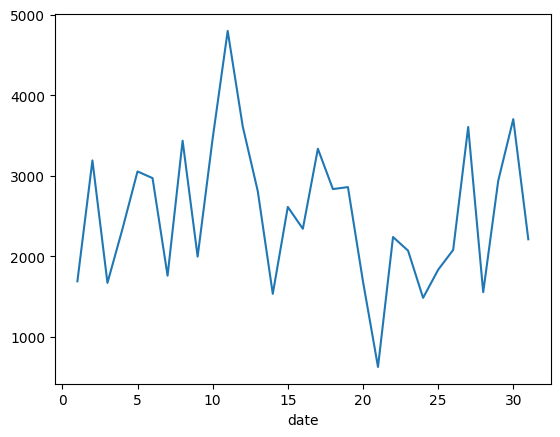

In [ ]:
short_naft_fa_df['text'].str.len().groupby(by=short_naft_fa_df.index.day).mean().plot()

In [ ]:
short_naft_fa_df.index = pd.to_datetime(short_naft_fa_df.index)

# Φιλτράρισμα από 26 Ιανουαρίου 2025 και μετά
short_naft_fa_df = short_naft_fa_df[short_naft_fa_df.index >= '2025-01-26']

<Axes: xlabel='date'>

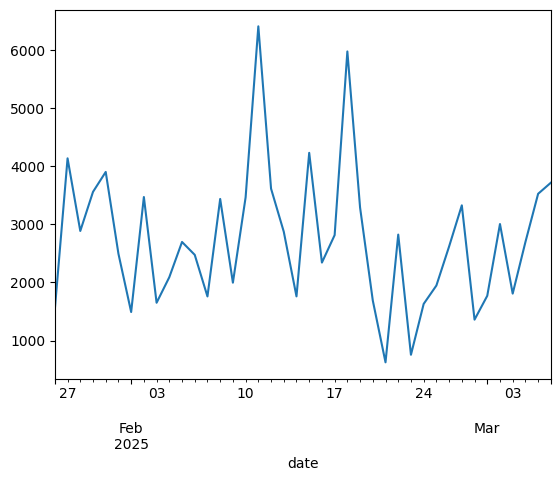

In [ ]:
short_naft_fa_df['text'].str.len().resample('D').mean().plot()

<Axes: ylabel='date'>

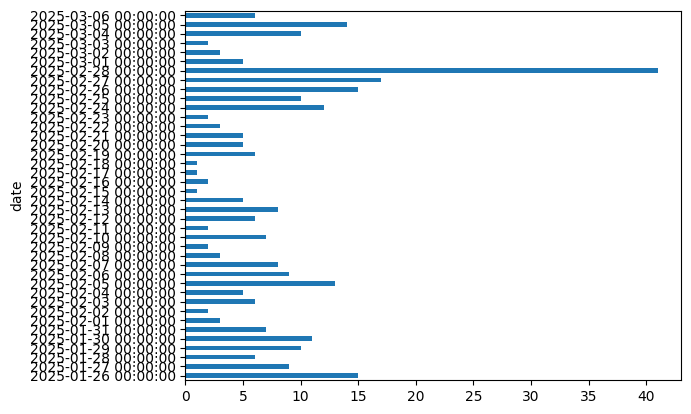

In [ ]:
short_naft_fa_df['text'].resample('D').count().plot(kind='barh')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('seaborn-v0_8-bright')

<ipython-input-56-294910560>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_naft_fa_df.fillna(method='ffill', inplace=True)


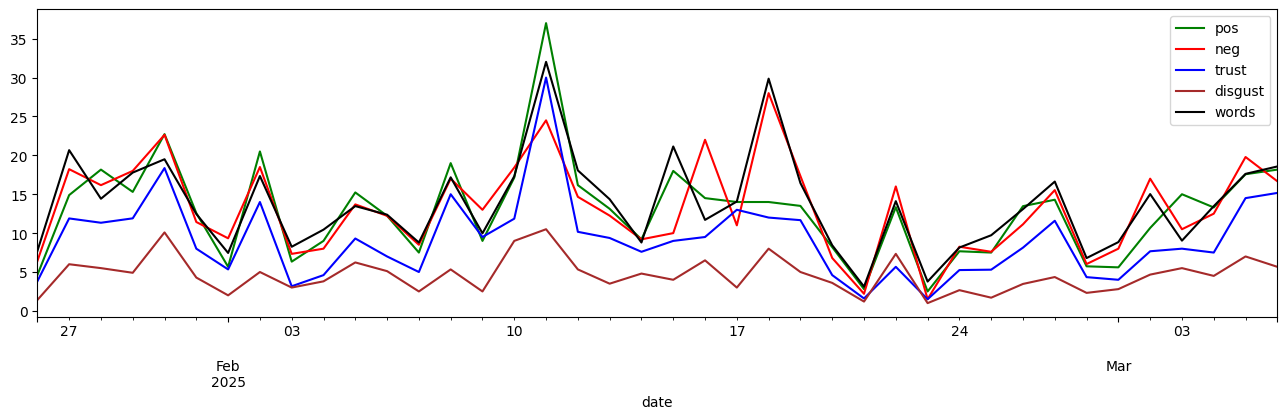

In [ ]:
ax = short_naft_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_naft_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_naft_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_naft_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_naft_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_naft_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('ggplot')

<ipython-input-58-294910560>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_naft_fa_df.fillna(method='ffill', inplace=True)


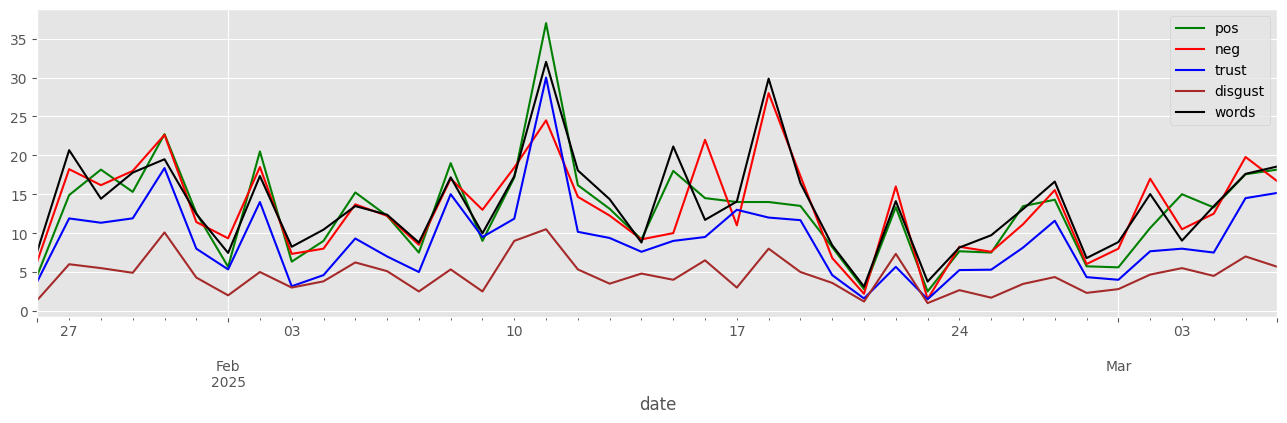

In [ ]:
ax = short_naft_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_naft_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_naft_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_naft_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_naft_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_naft_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('classic')

<ipython-input-60-294910560>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_naft_fa_df.fillna(method='ffill', inplace=True)


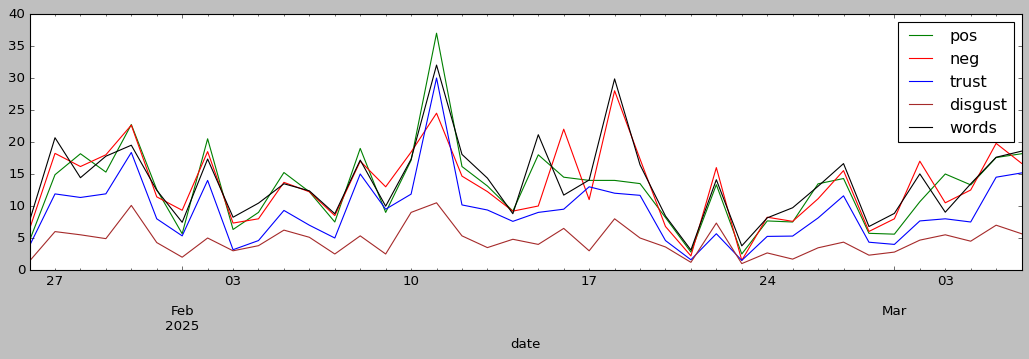

In [ ]:
ax = short_naft_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_naft_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_naft_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_naft_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_naft_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_naft_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
plt.style.use('classic')

<ipython-input-62-294910560>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  short_naft_fa_df.fillna(method='ffill', inplace=True)


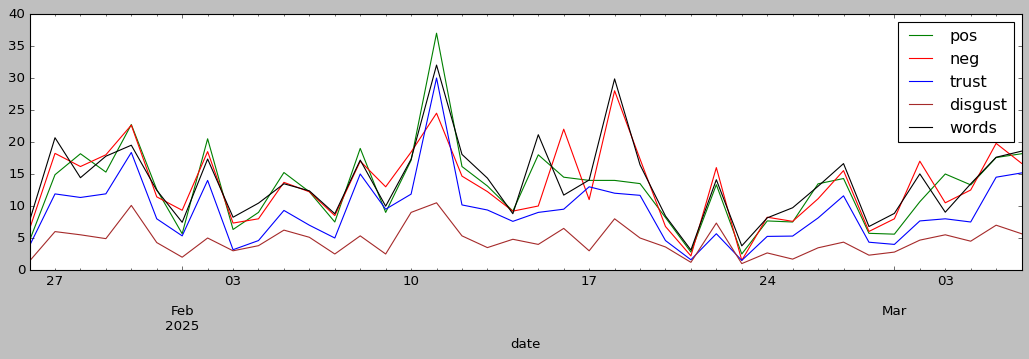

In [ ]:
ax = short_naft_fa_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_naft_fa_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_naft_fa_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_naft_fa_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_naft_fa_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
short_naft_fa_df.fillna(method='ffill', inplace=True)

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

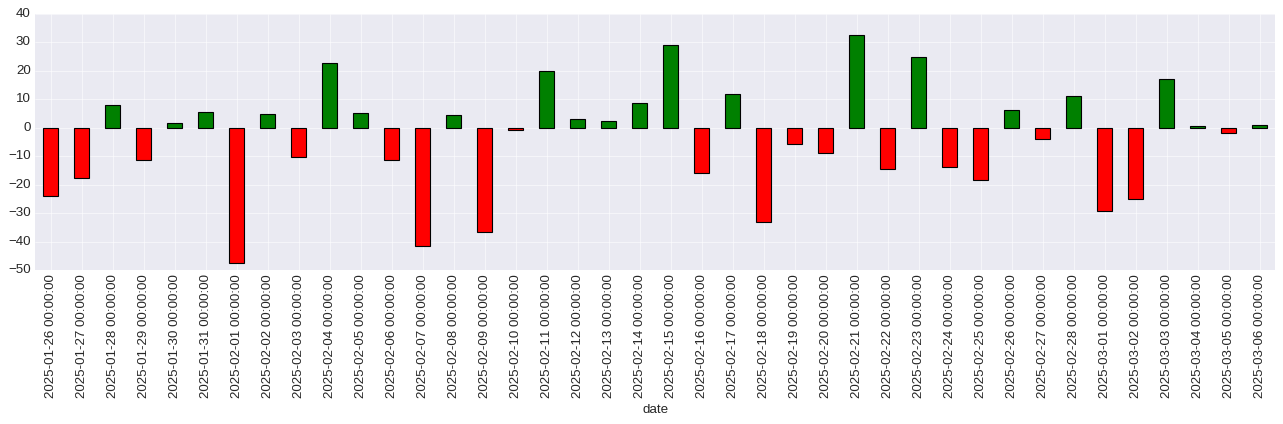

In [ ]:
short_naft_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_naft_fa_df.positive*100//short_naft_fa_df[['positive','negative']].sum(
        axis=1) - short_naft_fa_df.negative*100//short_naft_fa_df[['positive','negative']].sum(axis=1)

short_naft_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_naft_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(20,4))